<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src = "https://github.com/Jangrae/img/blob/master/attrition.png?raw=true" width=800/></center>

# 실습 내용

- Attrition 데이터로 모델링합니다.
- Random Forest 알고리즘으로 모델링합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/Attrition_simple2.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4


**데이터 설명**

- Attrition: 이직 여부 (1: 이직, 0: 잔류)
- Age: 나이
- DistanceFromHome: 집-직장 거리 (단위: 마일)
- EmployeeNumber: 사번
- Gender: 성별 (Male, Female)
- JobSatisfaction: 직무 만족도(1: Low, 2: Medium, 3: High, 4: Very High)
- MaritalStatus: 결혼 상태 (Single, Married, Divorced)
- MonthlyIncome: 월급 (단위: 달러)
- OverTime: 야근 여부 (Yes, No)
- PercentSalaryHike: 전년 대비 급여 인상율(단위: %)
- TotalWorkingYears: 총 경력 연수

In [7]:
# 기술통계 확인
data.describe()

,Attrition,Age,DistanceFromHome,EmployeeNumber,JobSatisfaction,MonthlyIncome,PercentSalaryHike,TotalWorkingYears
count,1196.000000,1196.00000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000
mean,0.163043,36.94398,9.258361,1035.629599,2.716555,6520.104515,15.251672,11.330268
std,0.369560,9.09270,8.166016,604.340130,1.110962,4665.902253,3.625946,7.823821
min,0.000000,18.00000,1.000000,1.000000,1.000000,1009.000000,11.000000,0.000000
25%,0.000000,30.00000,2.000000,507.750000,2.000000,2928.250000,12.000000,6.000000
50%,0.000000,36.00000,7.000000,1028.000000,3.000000,4973.500000,14.000000,10.000000
75%,0.000000,43.00000,14.000000,1581.250000,4.000000,8420.500000,18.000000,15.000000
max,1.000000,60.00000,29.000000,2068.000000,4.000000,19999.000000,25.000000,40.000000


In [8]:
# NaN 값 확인
data.isnull().sum()

Attrition            0
Age                  0
DistanceFromHome     0
EmployeeNumber       0
Gender               0
JobSatisfaction      0
MaritalStatus        0
MonthlyIncome        0
OverTime             0
PercentSalaryHike    0
TotalWorkingYears    0
dtype: int64

In [13]:
# 상관관계 확인
import pandas as pd

# 범주형 변수 매핑
data_encoded = data.copy()

# 예시: Attrition, Gender, MaritalStatus, OverTime
data_encoded['Attrition'] = data_encoded['Attrition'].map({'No': 0, 'Yes': 1}) if data_encoded['Attrition'].dtype=='object' else data_encoded['Attrition']
data_encoded['Gender'] = data_encoded['Gender'].map({'Male': 0, 'Female': 1})
data_encoded['MaritalStatus'] = data_encoded['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2})
data_encoded['OverTime'] = data_encoded['OverTime'].map({'No': 0, 'Yes': 1})

corr = data_encoded.corr()
print(corr)

# JobSatisfaction은 이미 수치형으로 보이므로 그대로 사용
corr_target = corr['Attrition'].sort_values(ascending=False)
print(corr_target)


                   Attrition       Age  DistanceFromHome  EmployeeNumber  \
Attrition           1.000000 -0.167866          0.081973       -0.008707   
Age                -0.167866  1.000000         -0.010917       -0.023786   
DistanceFromHome    0.081973 -0.010917          1.000000        0.054948   
EmployeeNumber     -0.008707 -0.023786          0.054948        1.000000   
Gender             -0.048527  0.026242          0.012972       -0.016653   
JobSatisfaction    -0.078936 -0.012425         -0.021623       -0.022863   
MaritalStatus      -0.187587  0.091120          0.019807        0.005160   
MonthlyIncome      -0.163572  0.490107         -0.012803       -0.014032   
OverTime            0.246641  0.005936          0.016693       -0.035646   
PercentSalaryHike  -0.000048 -0.008303          0.052348       -0.009514   
TotalWorkingYears  -0.182162  0.674331          0.002606       -0.016317   

                     Gender  JobSatisfaction  MaritalStatus  MonthlyIncome  \
Attrition

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 변수 제거**

- 제거 대상 변수: EmployeeNumber

In [14]:
# 제거 대상: EmployeeNumber
drop_cols = ['EmployeeNumber']

# 변수제거
data.drop(columns=drop_cols, inplace=True)

# 확인
data.head()


,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,Male,3,Married,11691,No,11,14
1,0,35,18,Male,4,Single,9362,No,11,10
2,0,42,6,Male,1,Married,13348,No,13,18
3,0,46,2,Female,1,Married,17048,No,23,28
4,1,22,4,Male,3,Single,3894,No,16,4


**2) x, y 분리**

In [15]:
# Target 설정
target = 'Attrition'

# 데이터 분리
x = data.drop(columns=target)
y = data.loc[:, target]

**3) 가변수화**

In [16]:
# 가변수화 대상: Gender, JobSatisfaction, MaritalStatus, OverTime
dumm_cols = ['Gender', 'JobSatisfaction', 'MaritalStatus', 'OverTime']

# 가변수화
x = pd.get_dummies(x, columns=dumm_cols, drop_first=True, dtype=int)

#  확인
x.head()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,Gender_Male,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,33,7,11691,11,14,1,0,1,0,1,0,0
1,35,18,9362,11,10,1,0,0,1,0,1,0
2,42,6,13348,13,18,1,0,0,0,1,0,0
3,46,2,17048,23,28,0,0,0,0,1,0,0
4,22,4,3894,16,4,1,0,1,0,0,1,0


**4) 학습용, 평가용 데이터 분리**

In [17]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 4.모델링 #1: RandomForest

- 여러 앙상블 알고리즘으로 모델을 만들고 성능을 비교해 봅니다.
- 우선 **RandomForest** 알고리즘으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.

In [18]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
# 2단계: 선언하기
model = RandomForestClassifier()

In [20]:
# 3단계: 학습하기
model.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
# 4단계: 예측하기
pred = model.predict(x_test)

In [23]:
# 5단계: 평가하기
print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

[[291  43]
 [  9  16]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       334
           1       0.27      0.64      0.38        25

    accuracy                           0.86       359
   macro avg       0.62      0.76      0.65       359
weighted avg       0.92      0.86      0.88       359



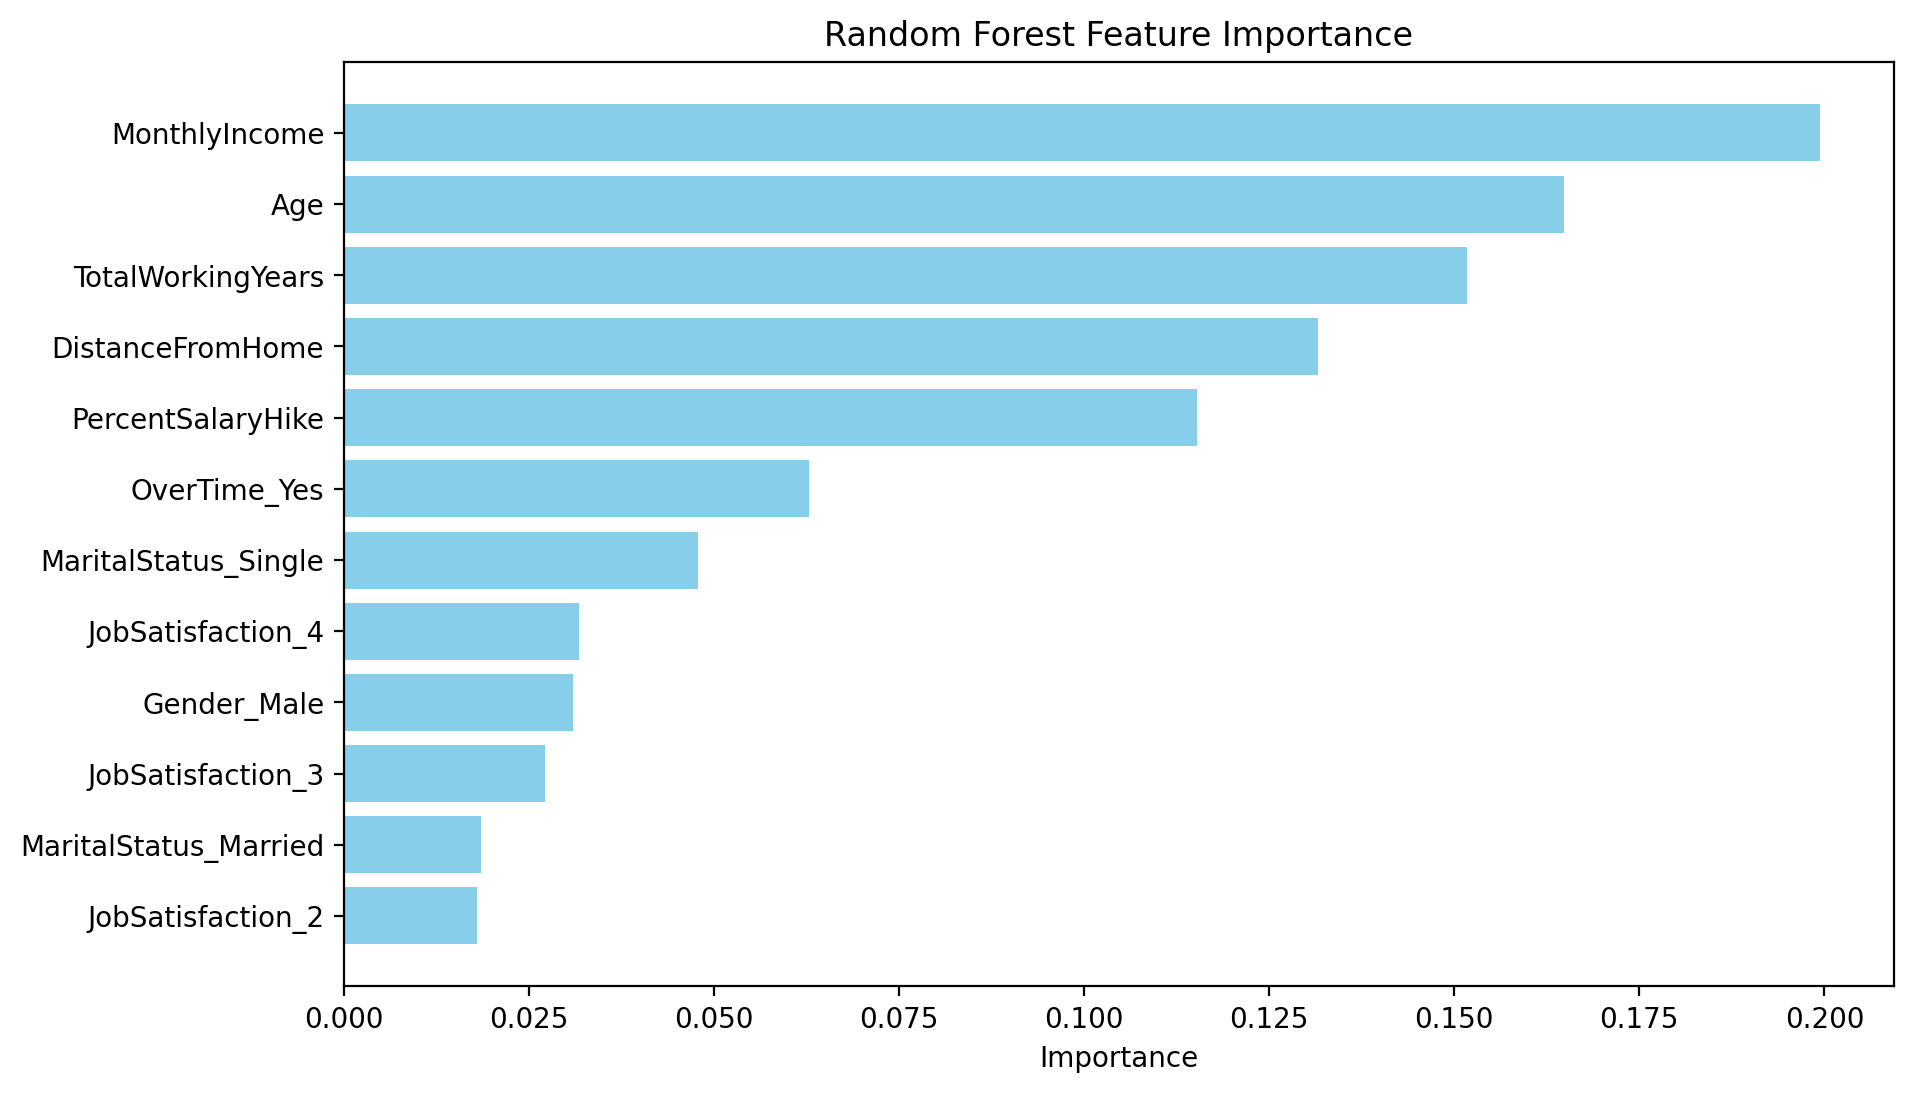

In [27]:
# 변수 중요도 시각화
# feature importance 추출
importances = model.feature_importances_
feature_names = x_train.columns

plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # 중요도 높은 변수를 위로
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

# 5.모델링 #2: GradientBoost

- 이제 **GradientBoost** 알고리즘으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.

In [29]:
# 1단계: 불러오기
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
# 2단계: 선언하기
model = GradientBoostingClassifier()

In [31]:
# 3단계: 학습하기
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [32]:
# 4단계: 예측하기
pred = model.predict(x_test)

In [33]:
# 5단계: 평가하기
print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

[[284  44]
 [ 16  15]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.90       328
           1       0.25      0.48      0.33        31

    accuracy                           0.83       359
   macro avg       0.60      0.67      0.62       359
weighted avg       0.89      0.83      0.86       359



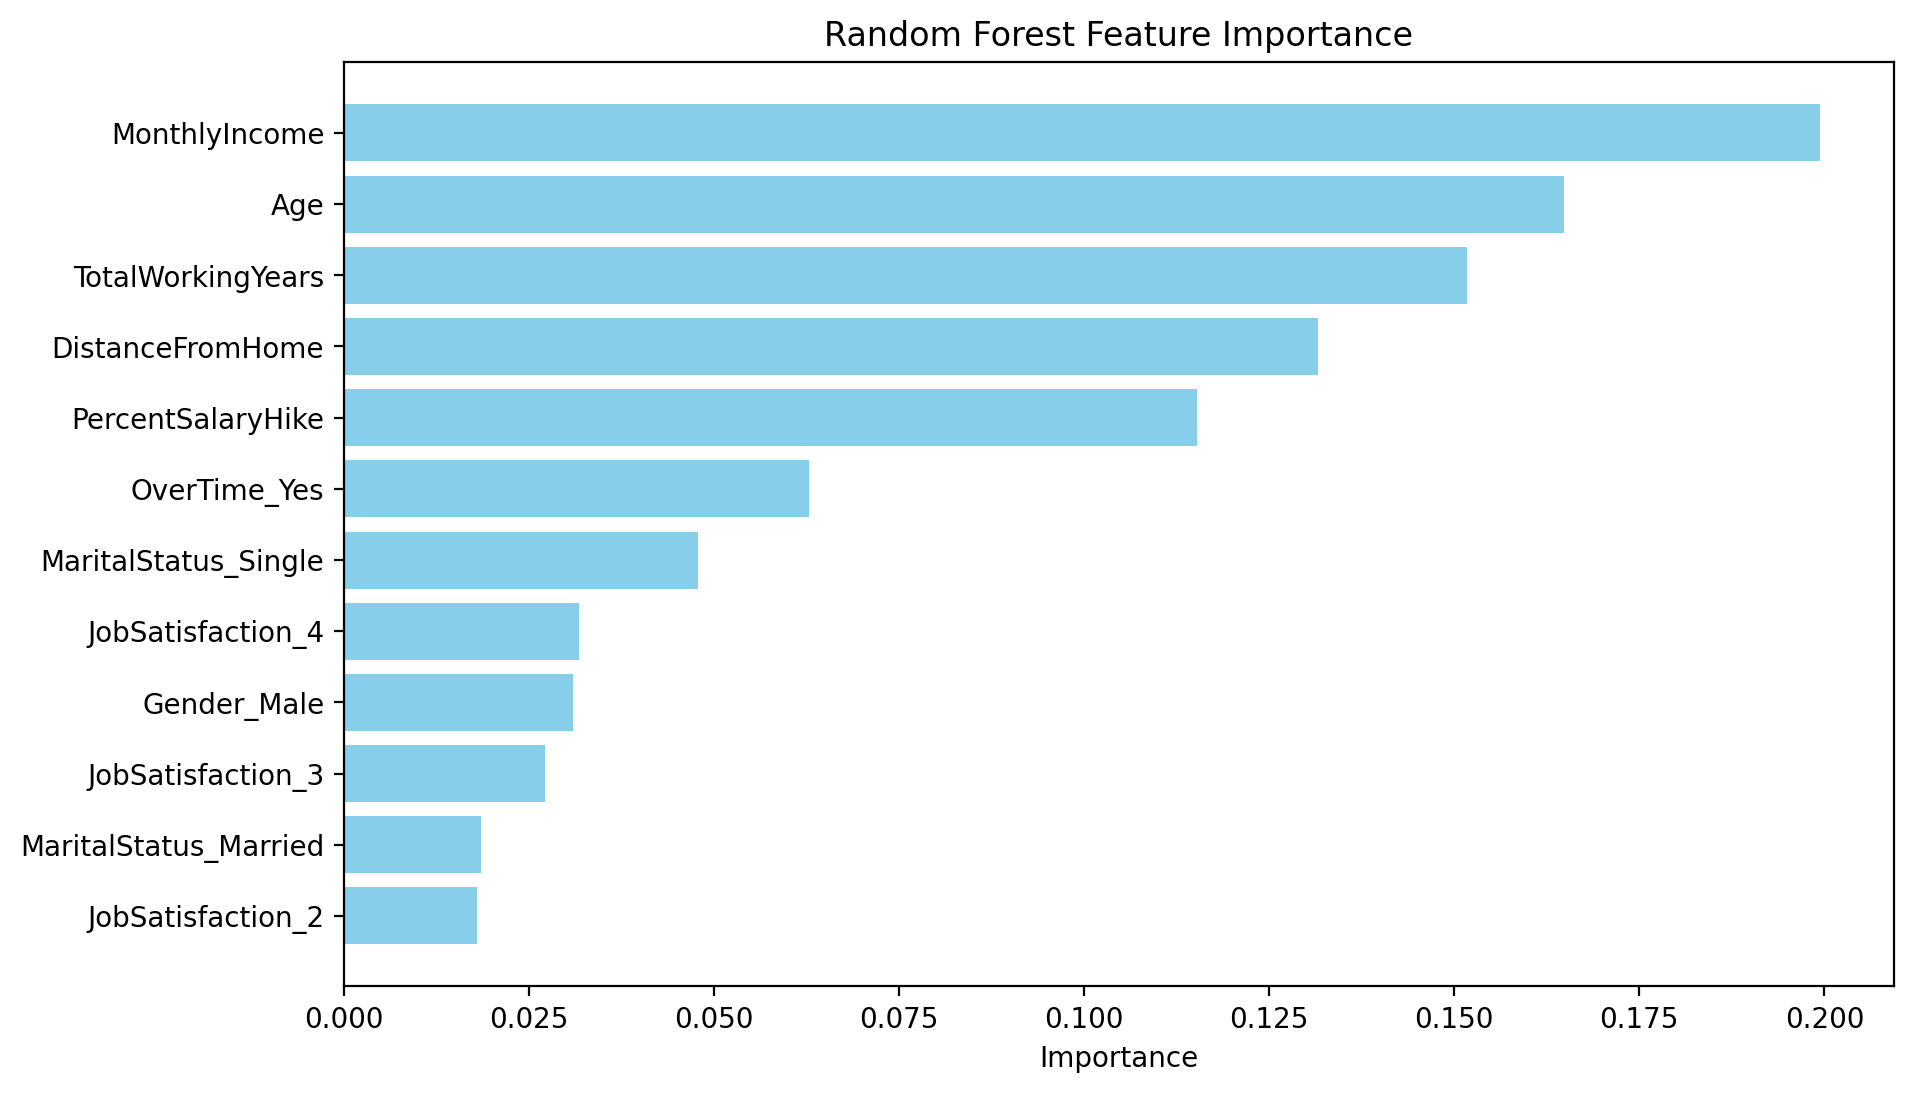

In [34]:
# 변수 중요도 시각화
# feature importance 추출
importances = model.feature_importances_
feature_names = x_train.columns

plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # 중요도 높은 변수를 위로
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

# 6.모델링 #3: XGBoost

- 이제 **XGBoost** 알고리즘으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- Anaconda를 사용하는 경우 xgboost 라이브러리를 설치해야 합니다.

In [35]:
# Anaconda의 경우 실행
!pip install xgboost -q

In [36]:
# 1단계: 불러오기
from xgboost import XGBClassifier

In [37]:
# 2단계: 선언하기
model = XGBClassifier()

In [38]:
# 3단계: 학습하기
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [39]:
# 4단계: 예측하기
pred = model.predict(x_test)

In [40]:
# 5단계: 평가하기
print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

[[278  39]
 [ 22  20]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       317
           1       0.34      0.48      0.40        42

    accuracy                           0.83       359
   macro avg       0.63      0.68      0.65       359
weighted avg       0.86      0.83      0.84       359



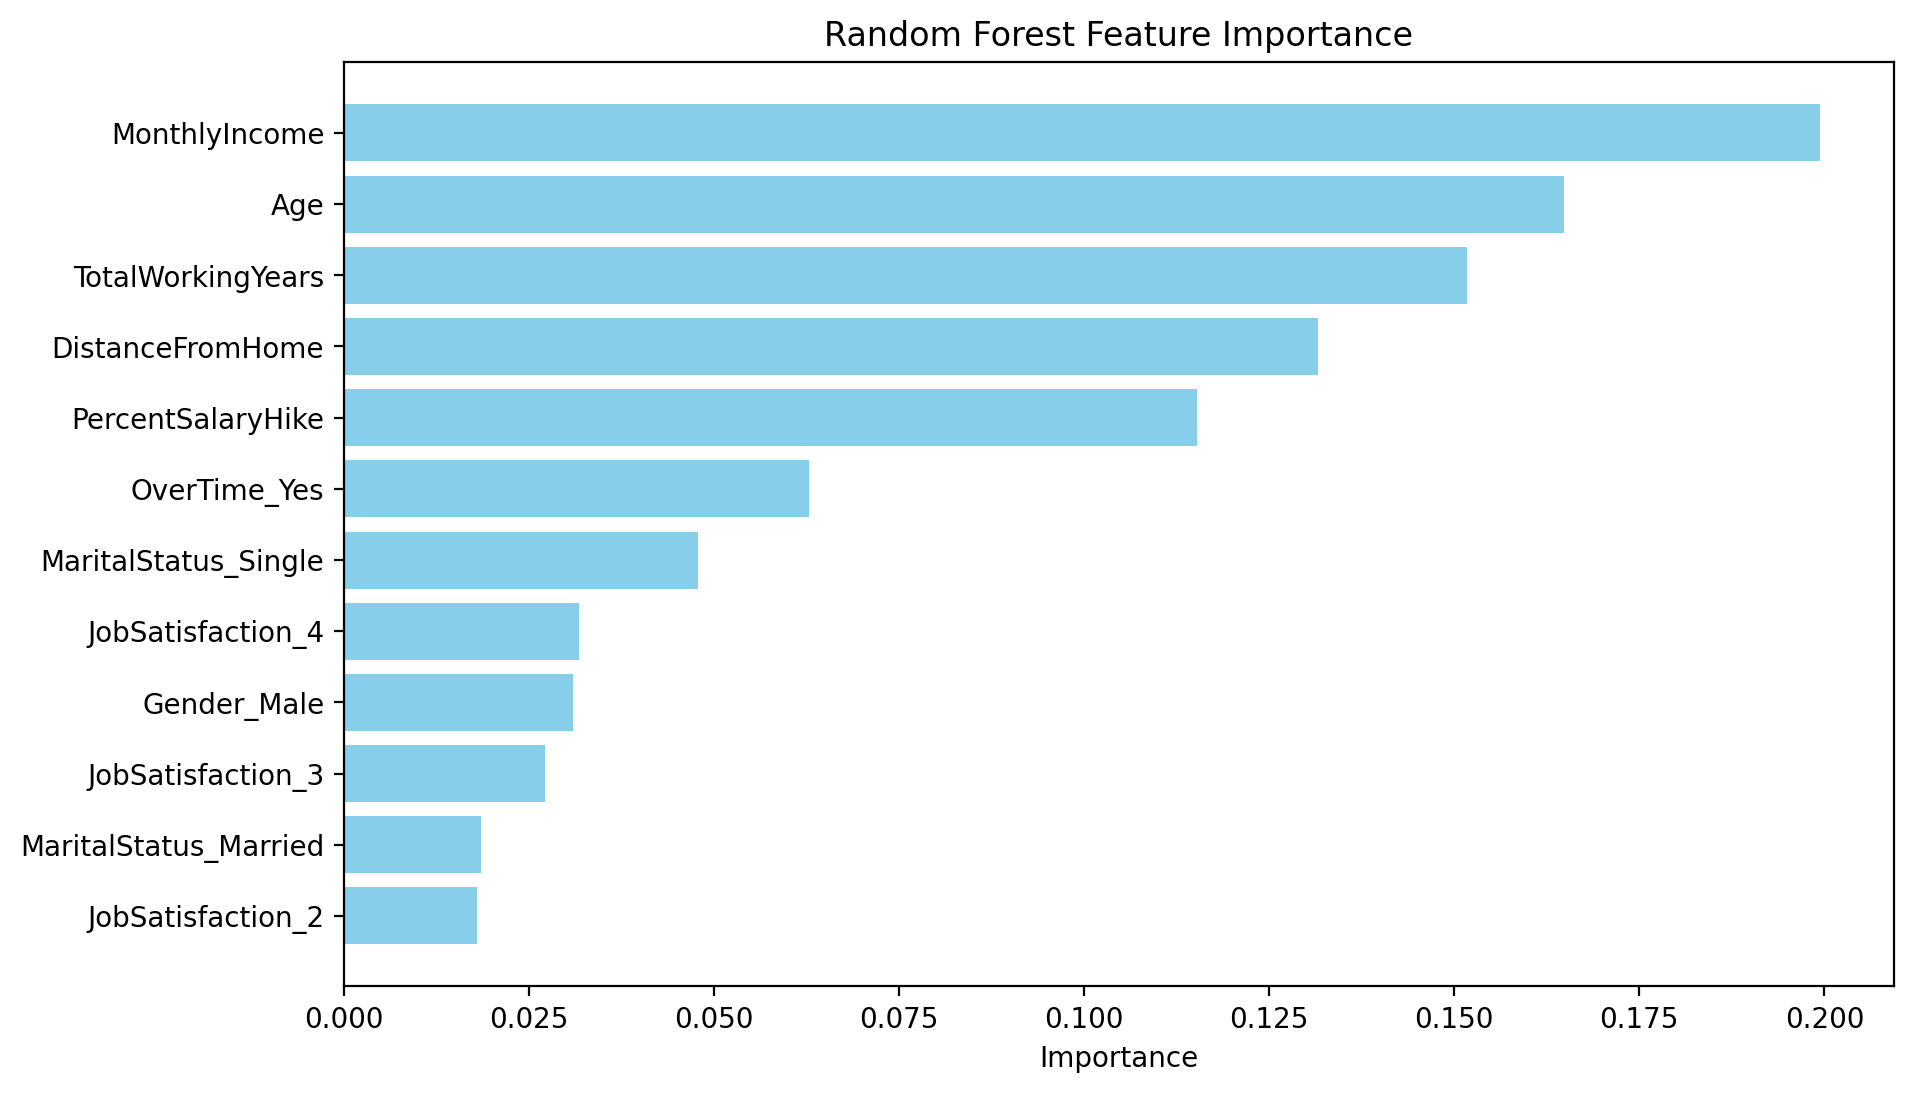

In [41]:
# 변수 중요도 시각화
# feature importance 추출
importances = model.feature_importances_
feature_names = x_train.columns

plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # 중요도 높은 변수를 위로
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()